## Parțial Călin Ionuț-Laurențiu - __SUBIECTUL I__
### Ex 3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prob]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


<Axes: title={'center': 'prob'}>

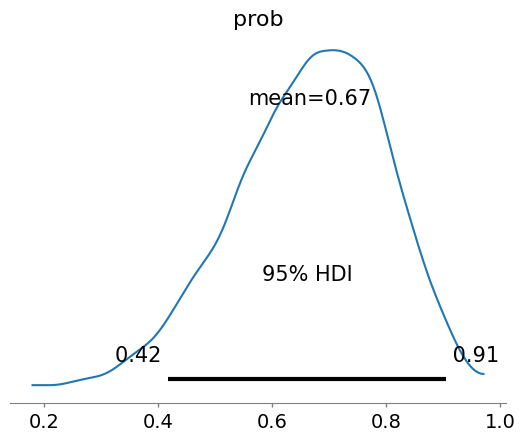

In [9]:
import numpy as np
import pymc as pm
import arviz as az

observations_1 = np.array([1,1,0,0,1,1,1,1,0,1])

with pm.Model() as model:
    prob = pm.Beta('prob',alpha=1,beta=1)
    likelyhood = pm.Bernoulli('toss',p=prob,observed=observations_1)
    trace = pm.sample(1_000)
    
az.plot_posterior(trace, var_names=['prob'], hdi_prob=0.95)

Se poate observa ca moneda are o probabilitate mare să fie măsluită

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prob, prob_2, prob_3]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


array([<Axes: title={'center': 'prob_2'}>,
       <Axes: title={'center': 'prob_3'}>], dtype=object)

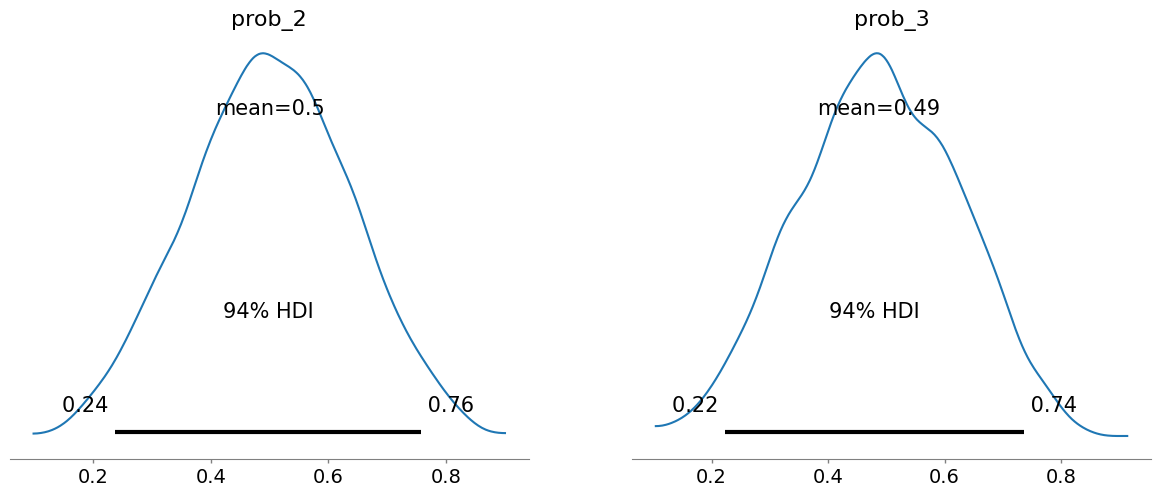

In [10]:
observations_2 = [0,0,1,0,1,1,0,1,1,0]

with model:
    # distributie Beta uniforma
    prob_2 = pm.Beta('prob_2',alpha=1,beta=1)
    likelyhood_1 = pm.Bernoulli('toss_2',p=prob_2,observed=observations_2)
    
    # distributia obtinuta la experimentul precedent
    prob_3 = pm.Beta('prob_3',alpha=prob,beta=1)
    likelyhood_2 = pm.Bernoulli('toss_3',p=prob_3,observed=observations_2)
    trace_2 = pm.sample(1_000)

az.plot_posterior(trace_2,var_names=['prob_2','prob_3'])

Se observă ca pentru al doilea set de observații, probabilitatea tinde spre 0.5, ce ne facem sa credem ca moneda nu este măsluită